<a href="https://colab.research.google.com/github/onssaadallah/ImageClef-Lifelog-2020/blob/main/ons_saadallah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import zipfile  # unziping 
import glob  # finding image paths
import numpy as np  # creating numpy arrays
from imutils import paths
import pandas as pd
import matplotlib.pyplot as plt
 
!unzip '/content/drive/MyDrive/Colab Notebooks/technical test/businessaifypinternshipcandidacyprocess.zip' -d data/ 
path ='/content/'
imagePaths1= sorted(list(paths.list_images(path)))

Archive:  /content/drive/MyDrive/Colab Notebooks/technical test/businessaifypinternshipcandidacyprocess.zip
replace data/tab0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/tab0.jpg           
  inflating: data/tab1.jpg           
  inflating: data/tab2.jpg           
  inflating: data/tab3.jpg           
  inflating: data/tab4.jpg           
  inflating: data/tab5.jpg           
  inflating: data/tab6.jpg           


In [ ]:
for i in range(len(imagePaths)):
    img=cv2.imread(imagePaths[i])
    print(img.shape)
    if (img.shape>(800,1800)):
        img=cv2.imread(imagePaths[i],cv2.IMREAD_UNCHANGED)
        scale_percent = 60 # percent of original size
        width = int(img.shape[1] * scale_percent / 100)
        height = int(img.shape[0] * scale_percent / 100)
        dim = (width, height)
        # resize image
        resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        cv2.imwrite('resized'+str(i)+'.jpg',resized)

(268, 1112, 3)
(386, 746, 3)
(864, 1855, 3)


NameError: ignored

In [ ]:
!pip install tesseract

     |████████████████████████████████| 45.6MB 93kB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-cp37-none-any.whl size=45562571 sha256=4dacae8cc11ff12ed26049e6c6e4a2bf7f5249103ec04f638d9d2575dbbf78a1
  Stored in directory: /root/.cache/pip/wheels/82/1f/d9/24797b123379e4ea9511cf660835468b62dad609634cad2aba
Successfully built tesseract


In [ ]:
!pip install pytesseract

In [ ]:
test=cv2.imread('/content/drive/MyDrive/Colab Notebooks/technical test/tab-excel (2).png')

In [ ]:
try:
    from PIL import Image
except ImportError:
    import Image
import pytesseract

def extraxt_table(img_p,l):
    img1 = cv2.imread(img_p)
    img1.shape
    gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    bw= cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                          cv2.THRESH_BINARY, 15, -2)

    img_bin=bw.copy()
 
    #Plotting the image to see the output
    plotting = plt.imshow(img_bin,cmap='gray')
    plt.show()
    # countcol(width) of kernel as 100th of total width
    kernel_len = np.array(img1).shape[1]//100
    # Defining a vertical kernel to detect all vertical lines of image 
    ver_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_len))
    # Defining a horizontal kernel to detect all horizontal lines of image
    hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 1))
    # A kernel of 2x2
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
    #Use vertical kernel to detect and save the vertical lines in a jpg
    image_1 = cv2.erode(img_bin, ver_kernel, iterations=3)
    vertical_lines = cv2.dilate(image_1, ver_kernel, iterations=3)
    #Plot the generated image
    plotting = plt.imshow(image_1,cmap='gray')
    plt.show()
    #Use horizontal kernel to detect and save the horizontal lines in a jpg
    image_2 = cv2.erode(img_bin, hor_kernel, iterations=3)
    horizontal_lines = cv2.dilate(image_2, hor_kernel, iterations=3)
    #Plot the generated image
    plotting = plt.imshow(image_2,cmap='gray')
    plt.show()
    # Combine horizontal and vertical lines in a new third image, with both having same weight.
    img_vh = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
    #Eroding and thesholding the image
    img_vh = cv2.erode(~img_vh, kernel, iterations=2)
    thresh, img_vh = cv2.threshold(img_vh,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    cv2.imwrite("img_vh"+str(l)+".jpg", img_vh)
    img = cv2.imread(img_p,0)
    bitxor = cv2.bitwise_xor(img,img_vh)
    bitnot = cv2.bitwise_not(bitxor)
    #Plotting the generated image
    plotting = plt.imshow(bitnot,cmap='gray')
    plt.show()
    # Detect contours for following box detection
    contours, hierarchy = cv2.findContours(img_vh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    def sort_contours(cnts, method="left-to-right"):
        # initialize the reverse flag and sort index
        reverse = False
        i = 0
        # handle if we need to sort in reverse
        if method == "right-to-left" or method == "bottom-to-top":
            reverse = True
        # handle if we are sorting against the y-coordinate rather than
        # the x-coordinate of the bounding box
        if method == "top-to-bottom" or method == "bottom-to-top":
            i = 1
        # construct the list of bounding boxes and sort them from top to
        # bottom
        boundingBoxes = [cv2.boundingRect(c) for c in cnts]
        (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))
        # return the list of sorted contours and bounding boxes
        return (cnts, boundingBoxes)

    # Sort all the contours by top to bottom.
    contours, boundingBoxes = sort_contours(contours, method="top-to-bottom")

    #Creating a list of heights for all detected boxes
    heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
    #Get mean of heights
    mean = np.mean(heights)
    #Create list box to store all boxes in  
    box = []
    # Get position (x,y), width and height for every contour and show the contour on image
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if (w<1000 and h<500):
            image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            box.append([x,y,w,h])
        
    plotting = plt.imshow(image,cmap='gray')
    plt.show()

    #Creating two lists to define row and column in which cell is located
    row=[]
    column=[]
    j=0
    #Sorting the boxes to their respective row and column
    for i in range(len(box)):    
        if (i==0):
            column.append(box[i])
            previous=box[i]    
    
        else:
            if (box[i][1]<=previous[1]+mean/2):
                column.append(box[i])
                previous=box[i]            
            
                if (i==len(box)-1):
                    row.append(column)        
            
            else:
                row.append(column)
                column=[]
                previous = box[i]
                column.append(box[i])
            
    print(column)
    print(row)

    #calculating maximum number of cells
    countcol = 0
    for i in range(len(row)):
        countcol = len(row[i])
        if countcol > countcol:
            countcol = countcol

    #Retrieving the center of each column
    center = [int (row[i][j][0]+row[i][j][2]/2) for j in range(len(row[i])) if row[0]]
    center=np.array(center)
    center.sort()
    print(center)
    #Regarding the distance to the columns center, the boxes are arranged in respective order

    finalboxes = []
    for i in range(len(row)):
        lis=[]
        for k in range(countcol):
            lis.append([])
        for j in range(len(row[i])):
            diff = abs(center-(row[i][j][0]+row[i][j][2]/4))
            minimum = min(diff)
            indexing = list(diff).index(minimum)
            lis[indexing].append(row[i][j])
        finalboxes.append(lis)

    outer=[]
    for i in range(len(finalboxes)):
        for j in range(len(finalboxes[i])):
            inner=''
            if (len(finalboxes[i][j])==0):
                outer.append(' ')
            else:
                for k in range(len(finalboxes[i][j])):
                    y,x,w,h = finalboxes[i][j][k][0],finalboxes[i][j][k][1], finalboxes[i][j][k][2],finalboxes[i][j][k][3]
                    finalimg = bitnot[x:x+h, y:y+w]
                    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
                    border = cv2.copyMakeBorder(finalimg,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
                    resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
                    dilation = cv2.dilate(resizing, kernel,iterations=1)
                    erosion = cv2.erode(dilation, kernel,iterations=2)
                    out = pytesseract.image_to_string(erosion)
                    if (len(out)==0):
                        out = pytesseract.image_to_string(erosion, config='--psm 3')
                    inner = inner +" "+ out
                outer.append(inner)
            

     #Creating a dataframe of the generated OCR list
    arr = np.array(outer)
    dataframe = pd.DataFrame(arr.reshape(len(row), countcol))
    print(dataframe)
    dataframe.to_csv("output_"+str(l) +".csv")
    dataframe.head()





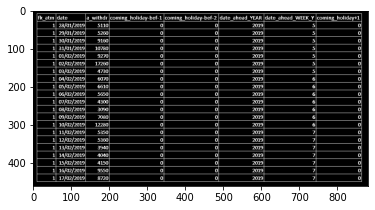

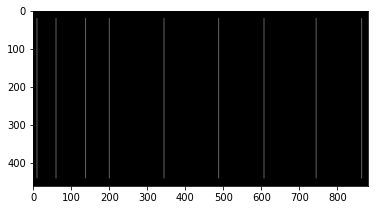

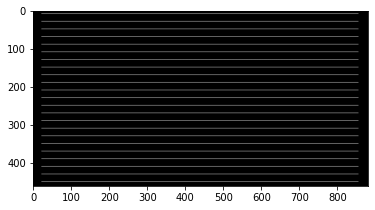

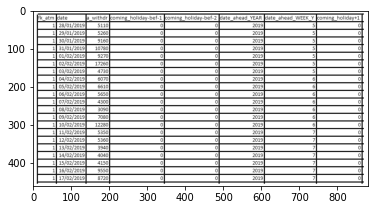

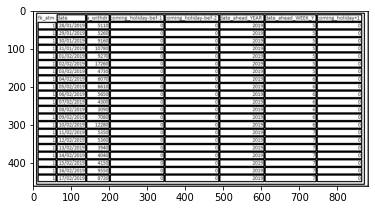

[[747, 432, 117, 17], [610, 432, 134, 17], [491, 432, 116, 17], [347, 432, 141, 17], [203, 432, 141, 17], [141, 432, 59, 17], [63, 432, 75, 17], [13, 432, 47, 17]]
[[[0, 0, 881, 461], [9, 8, 862, 448], [747, 12, 117, 17], [610, 12, 134, 17], [491, 12, 116, 17], [347, 12, 141, 17], [203, 12, 141, 17], [141, 12, 59, 17], [63, 12, 75, 17]], [[747, 32, 117, 17], [610, 32, 134, 17], [491, 32, 116, 17], [347, 32, 141, 17], [203, 32, 141, 17], [141, 32, 59, 17], [63, 32, 75, 17], [13, 32, 47, 17]], [[747, 52, 117, 17], [610, 52, 134, 17], [491, 52, 116, 17], [347, 52, 141, 17], [203, 52, 141, 17], [141, 52, 59, 17], [63, 52, 75, 17], [13, 52, 47, 17]], [[747, 72, 117, 17], [610, 72, 134, 17], [491, 72, 116, 17], [347, 72, 141, 17], [203, 72, 141, 17], [141, 72, 59, 17], [63, 72, 75, 17], [13, 72, 47, 17]], [[747, 92, 117, 17], [610, 92, 134, 17], [491, 92, 116, 17], [347, 92, 141, 17], [203, 92, 141, 17], [141, 92, 59, 17], [63, 92, 75, 17], [13, 92, 47, 17]], [[747, 112, 117, 17], [610, 112,

In [ ]:
extraxt_table('/content/drive/MyDrive/Colab Notebooks/technical test/tab-excel (2).png', 7)

In [ ]:
extraxt_table('/content/data/tab3.jpg',3)

In [ ]:
extraxt_table('/content/data/tab4.jpg',4)

In [ ]:
extraxt_table('/content/data/tab1.jpg',1)

In [ ]:

extraxt_table('/content/data/tab5.jpg',5)


In [ ]:
#rezised images 
extraxt_table('/content/resized2.jpg',2)


In [ ]:
extraxt_table('/content/resized6.jpg',6)

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 13 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,886 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
!sudo  install tesseract-ocr
!pip install pytesseract

install: missing destination file operand after 'tesseract-ocr'
Try 'install --help' for more information.
